In [1]:
from __future__ import division
import pandas as pd 
import numpy as np 

#Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

#Utilise Yahoo Finance for data
import yfinance as yf

/Users/ryan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
stocks = ['GOOG', 'TSLA', 'MSFT']
end = datetime.now()

#Look over preivous year
start = datetime(end.year-1, end.month, end.day)

for stock in stocks:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Visualise simple statistics relating to a stock listed above

GOOG.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,162.355323,162.772095,164.334530,161.191065,162.680641,1.982919e+07
std,15.193590,15.144130,15.276241,14.984126,15.119588,8.457212e+06
min,132.085388,132.559998,134.020004,131.059998,132.740005,7.409100e+06
25%,149.682175,150.009995,151.570007,148.559998,150.289993,1.456640e+07
50%,164.343552,164.639999,166.699997,163.632996,164.910004,1.754820e+07
75%,173.795532,174.309998,176.419998,172.750000,174.919998,2.153810e+07
max,196.710007,196.710007,196.889999,193.279999,196.300003,5.972800e+07


<Axes: xlabel='Date'>

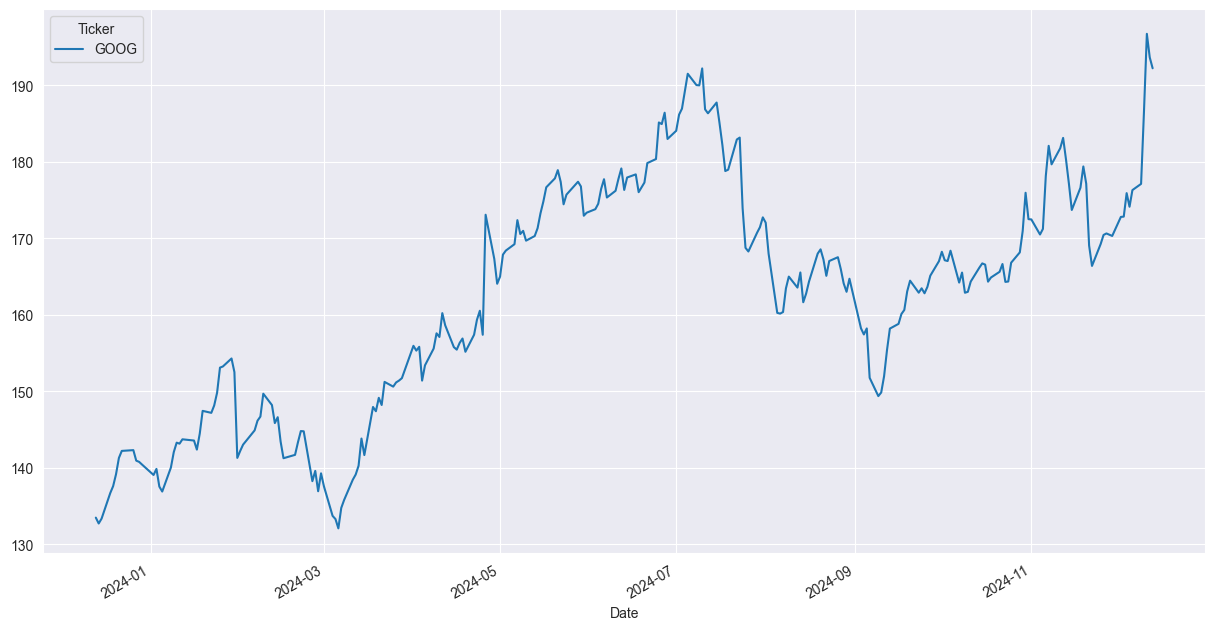

In [4]:
# Visualise change in stock price over time
sns.set_style('darkgrid')
GOOG['Adj Close'].plot(legend = True, figsize = (15,8))

<Axes: xlabel='Date'>

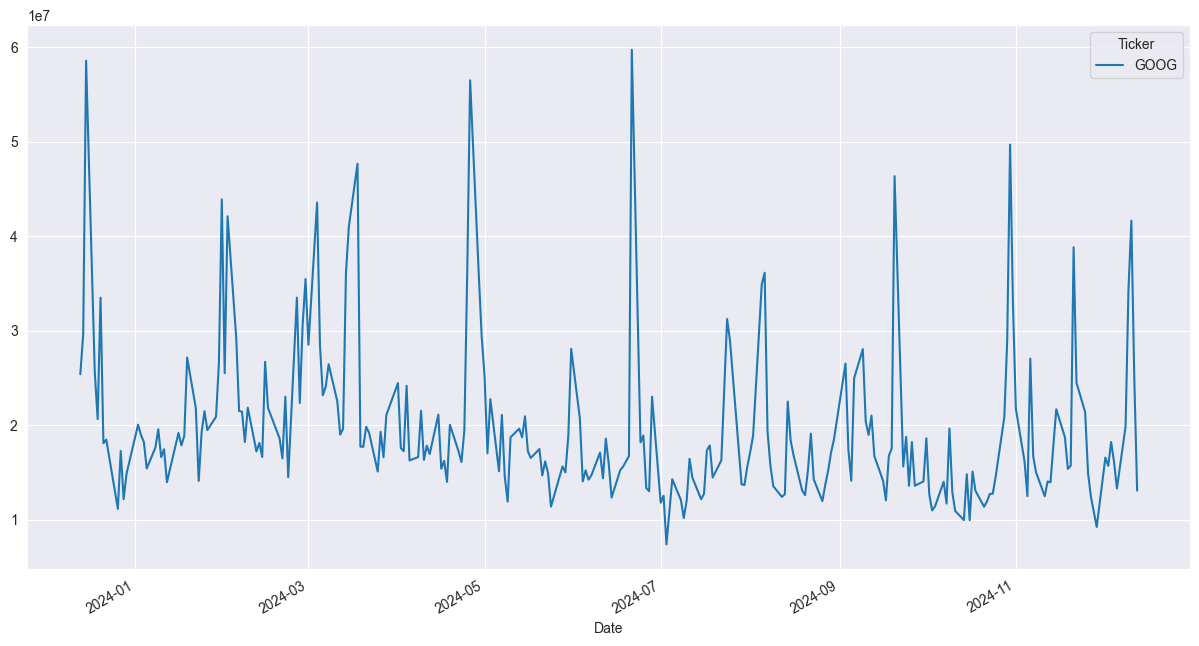

In [5]:
# Visualise volume
GOOG['Volume'].plot(legend = True, figsize = (15,8))

In [6]:
# Moving Average of stock listed above

average = [9, 21, 50]
for avg in average:
    label = "M.Avg for %s days" %(str(avg))
    GOOG[label] = GOOG['Adj Close'].rolling(window = avg, center = False).mean()
    
GOOG.tail()

Price,Adj Close,Close,High,Low,Open,Volume,M.Avg for 9 days,M.Avg for 21 days,M.Avg for 50 days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,,
2024-12-09,177.100006,177.100006,178.039993,175.399994,175.714996,19887800,173.372306,174.942054,170.992430
2024-12-10,186.529999,186.529999,188.029999,182.669998,184.535004,34317400,175.161567,175.269378,171.383019
2024-12-11,196.710007,196.710007,196.889999,186.259995,186.699997,41664500,178.059742,175.981102,171.952637
2024-12-12,193.630005,193.630005,196.705002,193.279999,196.300003,25197800,180.652320,176.481947,172.482829
2024-12-13,192.210007,192.210007,194.339996,191.669403,192.750000,13093235,182.810767,177.049781,172.986618


<Axes: xlabel='Date'>

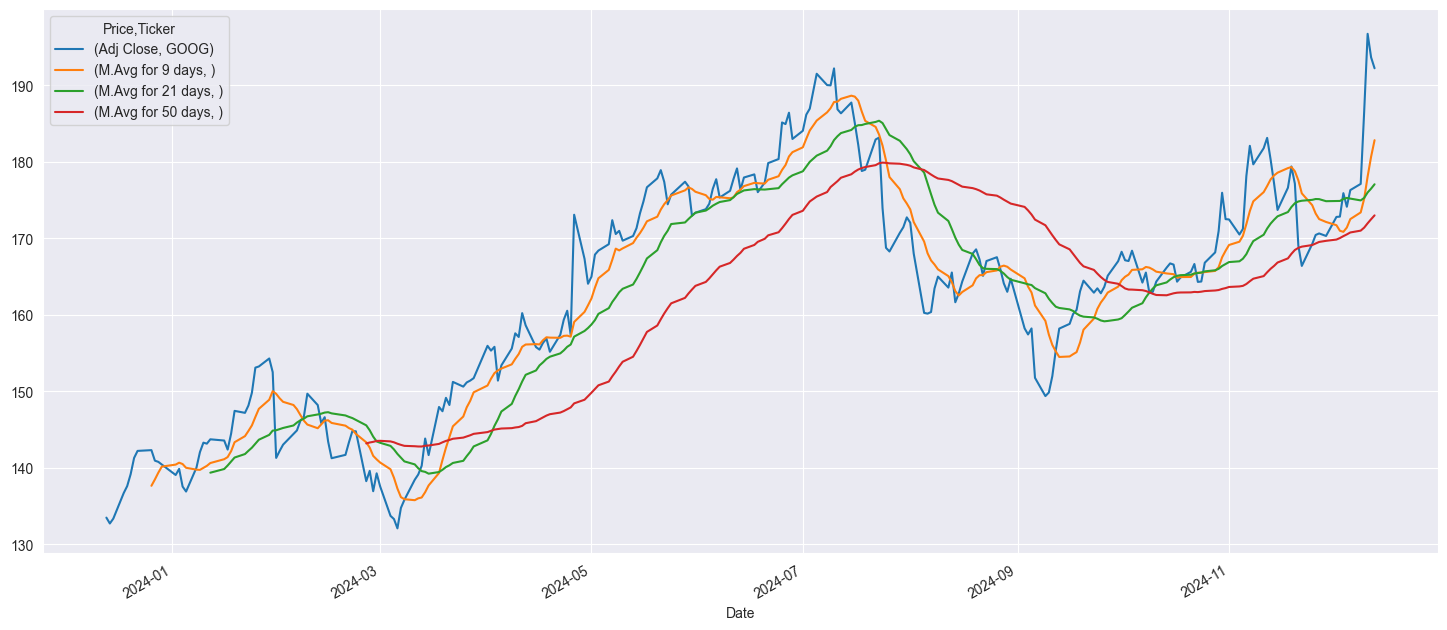

In [7]:
GOOG[['Adj Close', 'M.Avg for 9 days', 'M.Avg for 21 days', 'M.Avg for 50 days']].plot(subplots = False, figsize = (18,8))

In [8]:
# Daily Return on Average

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG.tail()

Price,Adj Close,Close,High,Low,Open,Volume,M.Avg for 9 days,M.Avg for 21 days,M.Avg for 50 days,Daily Return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,,,
Date,,,,,,,,,,
2024-12-09,177.100006,177.100006,178.039993,175.399994,175.714996,19887800,173.372306,174.942054,170.992430,0.004595
2024-12-10,186.529999,186.529999,188.029999,182.669998,184.535004,34317400,175.161567,175.269378,171.383019,0.053247
2024-12-11,196.710007,196.710007,196.889999,186.259995,186.699997,41664500,178.059742,175.981102,171.952637,0.054576
2024-12-12,193.630005,193.630005,196.705002,193.279999,196.300003,25197800,180.652320,176.481947,172.482829,-0.015658
2024-12-13,192.210007,192.210007,194.339996,191.669403,192.750000,13093235,182.810767,177.049781,172.986618,-0.007334


<Axes: xlabel='Date'>

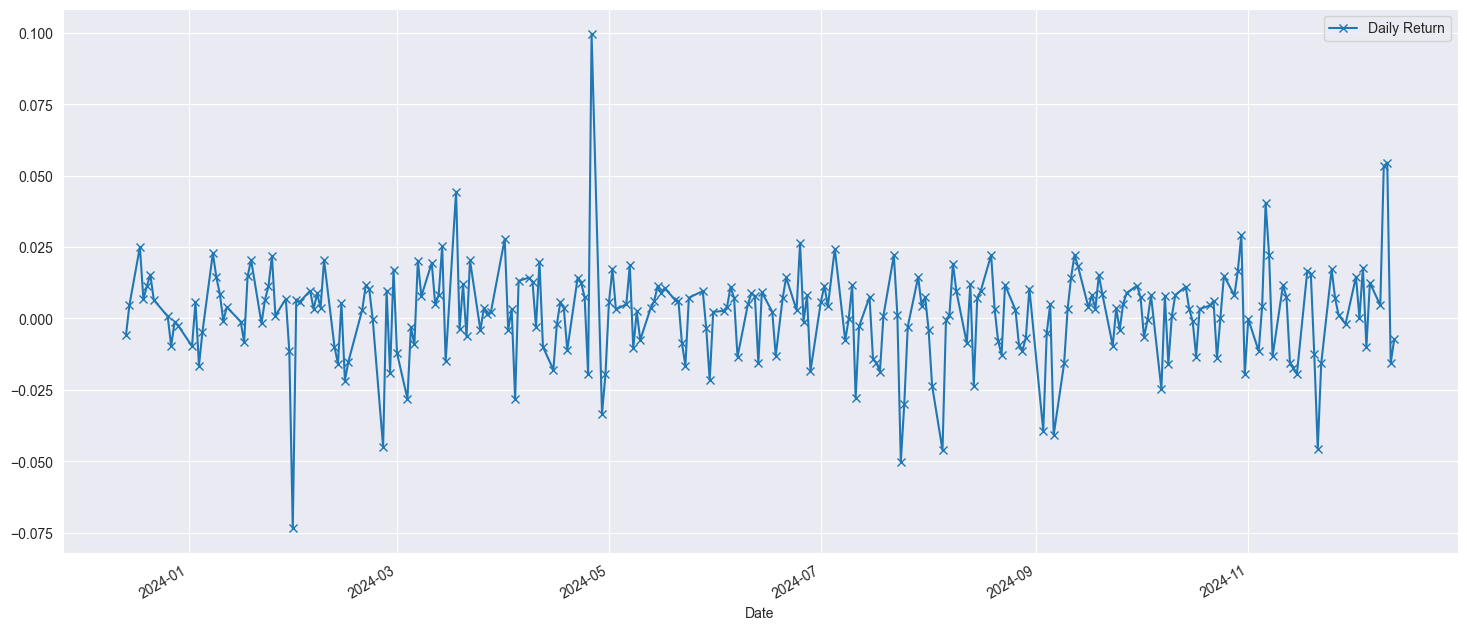

In [9]:
# Visaulise the Daily Return on Average
GOOG['Daily Return'].plot(legend = True, figsize = (18,8), linestyle = '-', marker = 'x')

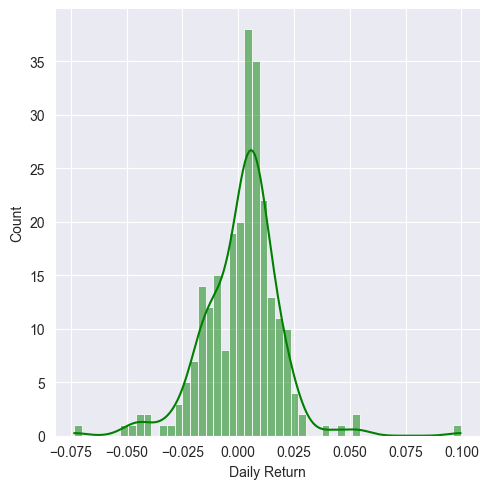

In [22]:
# Visualise the distribution of data utilising Seaborn

sns.displot(GOOG['Daily Return'].dropna(), color = 'Green', bins=50, kde = True)

In [24]:
# Check for correlation between all stocks above daily returns

comparison = yf.download(stocks, start, end)['Adj Close']
comparison_chng = comparison.pct_change()
comparison_chng.head()

[*********************100%***********************]  3 of 3 completed


Ticker,GOOG,MSFT,TSLA
Date,,,
2023-12-13,NaN,NaN,NaN
2023-12-14,-0.005748,-0.022544,0.049145
2023-12-15,0.004805,0.013117,0.009759
2023-12-18,0.025030,0.005179,-0.005602
2023-12-19,0.006633,0.001637,0.020390


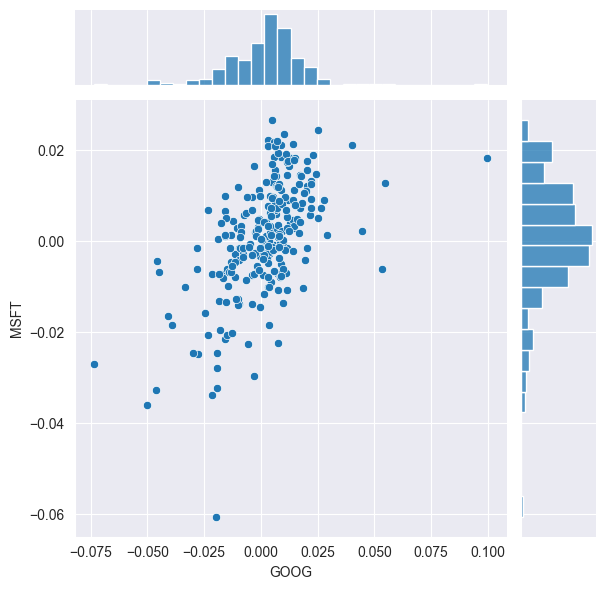

In [38]:
#Visualise on a Scattertable
sns.jointplot(x='GOOG',y='MSFT', data=comparison_chng, kind='scatter')

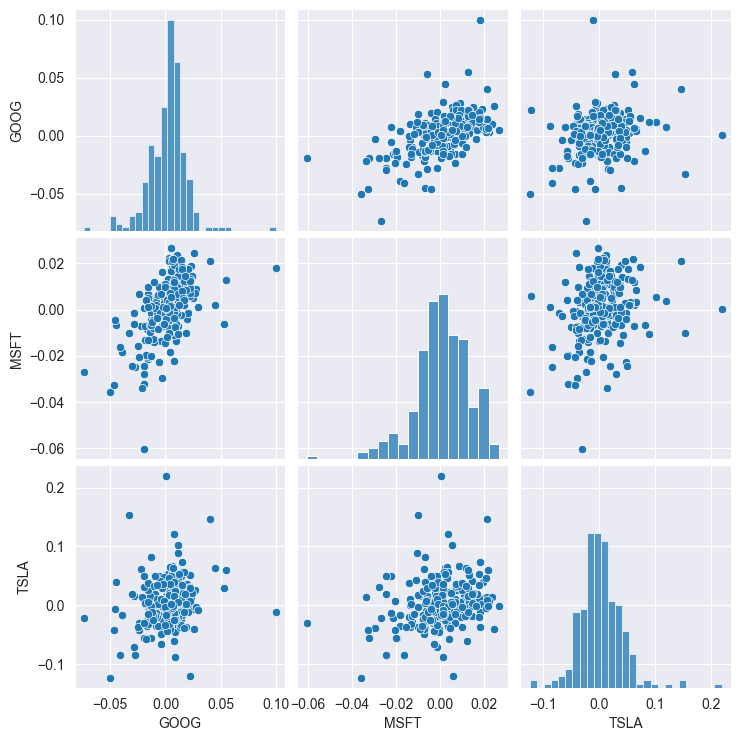

In [39]:
#Create multiple plots to visualise all of the stocks listed
sns.pairplot(comparison_chng.dropna())

Ticker      GOOG      MSFT      TSLA
Ticker                              
GOOG    1.000000  0.559047  0.223591
MSFT    0.559047  1.000000  0.256384
TSLA    0.223591  0.256384  1.000000


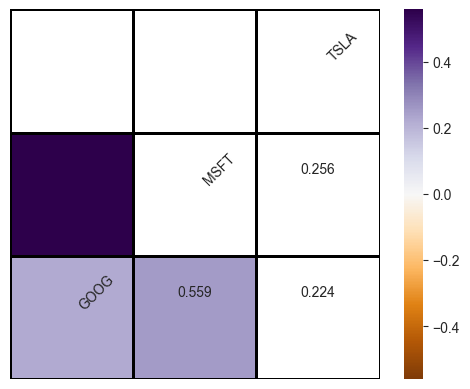

In [49]:
# Correlation Matrix Plot

correlation = comparison_chng.corr()
print(correlation)

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Matplotlib Setup
fig, ax = plt.subplots()

# Creation of heatmap

vmax = np.abs(correlation.values[~mask]).max()
sns.heatmap(correlation, mask=mask, cmap = plt.cm.PuOr, vmin = -vmax, vmax = vmax, square = True, linecolor = 'black', linewidths = 0.8, ax=ax)

for i in range(len(correlation)):
    ax.text(i+0.7, len(correlation) - (i+0.7), correlation.columns[i],
             ha = 'center', va = 'center', rotation = 45)
    for j in range(i+1, len(correlation)):
        s = "{:.3f}".format(correlation.values[i,j])
        ax.text(j+0.5,len(correlation)-(i+0.7),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()
